# Exploratory Data Analysis - Retail- Janvi Verma

* Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
* As a business manager, try to find out the weak areas where you can
work to make more profit.
* What all business problems you can derive by exploring the data?
* You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel/SAP/SAS)
* Dataset: https://bit.ly/3i4rbWl

In [1]:
# Import all necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Importing dataset

In [2]:
sample = pd.read_csv("SampleSuperstore.csv")
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
sample.shape

(9994, 13)

In [4]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#Checking Missing Values
sample.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Checking for data duplication

In [7]:
# Checking the dupilication in data
sample.duplicated().sum()

17

In [8]:
sample.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [9]:
sample.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
#Deleting the Variable.
col=['Postal Code']
sample1=sample.drop(columns=col,axis=1)

In [11]:
#Correlation Between Variables.
sample1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [12]:
# Covariance of columns
sample1.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


In [13]:
sample1.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# **Exploratory Data Analysis**
**Data Visualization**

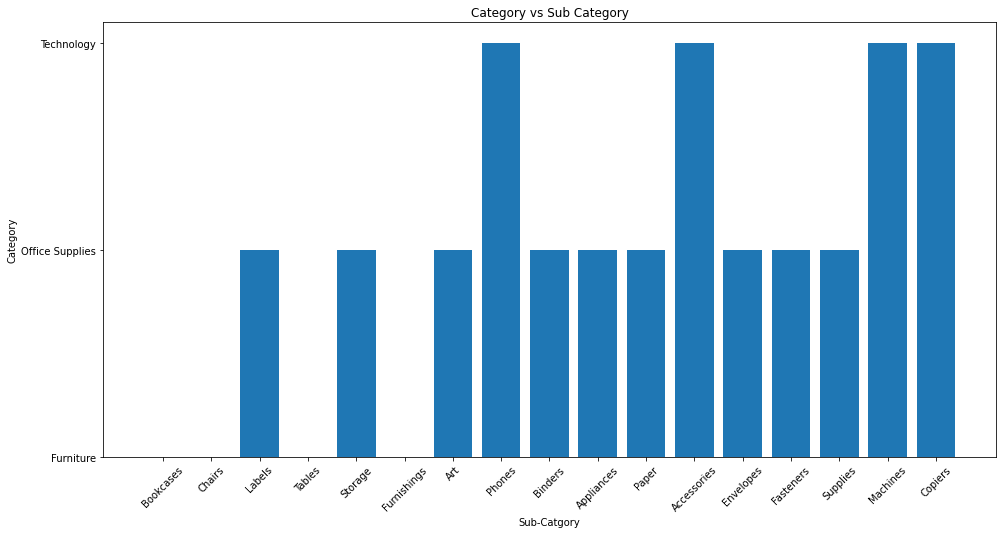

In [14]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=sample1)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

In [15]:
sample1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


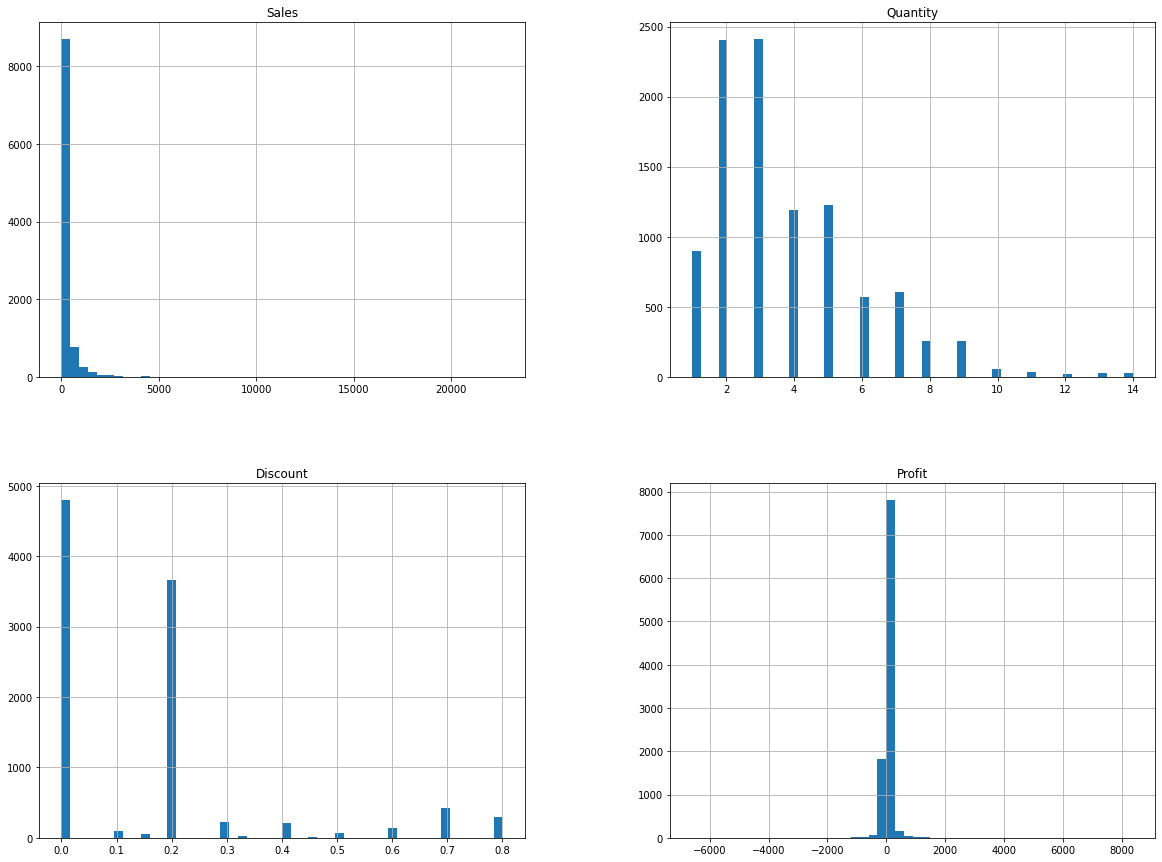

In [17]:
sample1.hist(bins=50 ,figsize=(20,15))
plt.show();

From this histogram we can say that our data is not normal.

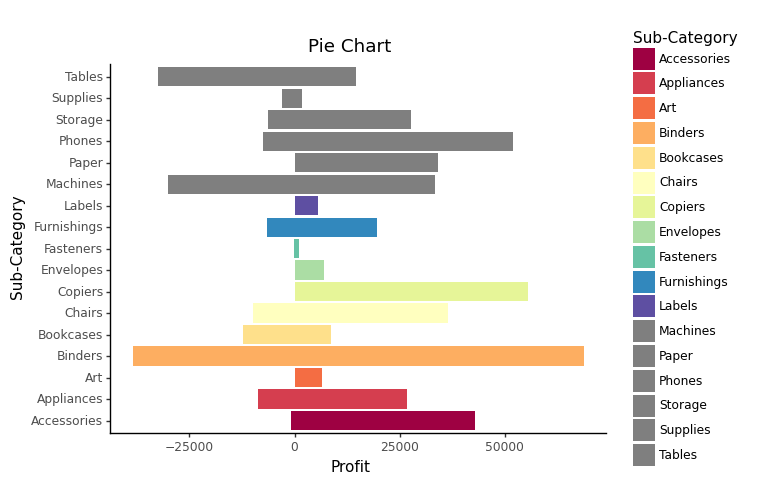

<ggplot: (8760245829286)>

In [19]:
Profit_plot = (ggplot(sample, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

Above Pie chart Shows the profit and loss of each and every subcategories.Here from graph we can visualize that "binders" sub-category has suffered the highest amount of loss and also profit amongst all other sub-Categories (For now we can't say that what is the reason it may be because of discounts given on binders subcategory)

**Next, "Copiers" Sub-category has gain highest amount of profit with no loss.There are other sub-categories too who are not faced any kind of losses but their profit margins are also low.**

**Next,Suffering from highest loss is machines.**

<function matplotlib.pyplot.show(*args, **kw)>

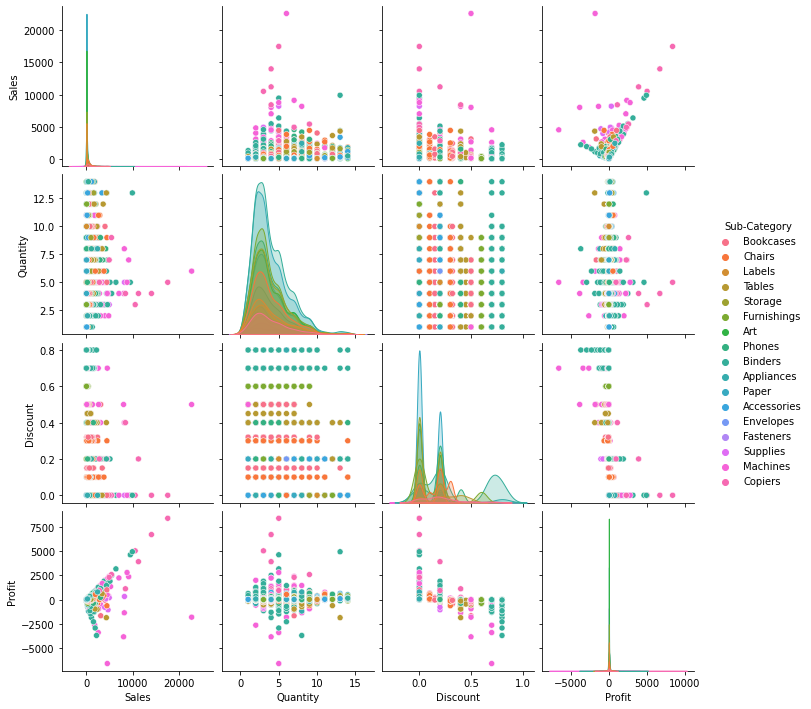

In [20]:
figsize=(15,10)
sns.pairplot(sample1,hue='Sub-Category')
plt.show

**From the above plot we can say that Our Data is not Normal and it has some amount of outliers too.**

**Let's explore more about these outliers by using boxplots.**

**Ist we'll check Sales from Every Segments of Whole Data**

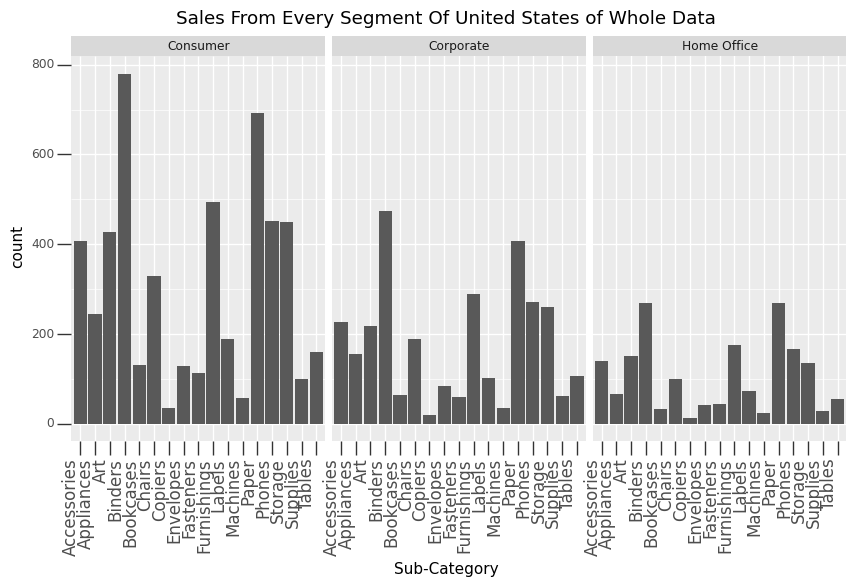

<ggplot: (8760253088410)>

In [21]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

From above Graph we can say that "Home Office" segment has less purchased Sub-Categories and in that "Tables","Supplies","Machines","Copiers","Bookcases" has the lowest Sales. "Consumer" has purchased more sub-categories as compared to other segments.

In [22]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
sample1['state_code'] = sample1.State.apply(lambda x: state_code[x])

In [23]:
# let's have a look at the total sales per state and the revenue generated.
state_data = sample1[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

Observations from the above given geographical plot-
>(A) The company has the highest sales in the state of California (shown in dark maroon), selling around $450K of goods.

>(B) New York (bright red, top right) is the state with the second highest sales, with more that $300k worth of goods sold.

>(C) The states of Texas (bottommost, orange) and Washington (top left, orange) end up third and fourth on the top sales charts     with around $170K and 140K in sales respectively.

>(D) If we look at the overall data, we will observe that the supermarket company does most of its business in East Coast and       West Coast region.

In fact, the total sales in the state of New York is more than the sales in all of the Central America combined.

In [24]:
fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, # Spatial coordinates
    z = state_data.Profit, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,0,0)'], [0.25, 'rgb(255,255,255)'], [0.45, 'rgb(124,208,247)'], [0.6, 'rgb(97,255,140)'], [1, 'rgb(8,181,0)']],
#     reversescale = True,
    colorbar_title = 'Profits in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope='usa', # limite map scope to USA
    height=600,
)

fig.show()

Observations from the above plot are:
>(1) The states in shades of green, namely New York, California and Washington are the most profitable for the company, with profits of over $30K.

>(2) The states in teal and blue, with an average profit of around $25K are mostly situated in the north-east and south-east region.

>(3) The state of Texas, with the third highest sales proved to be the most expensive state for the company with a very high loss of around $25K.

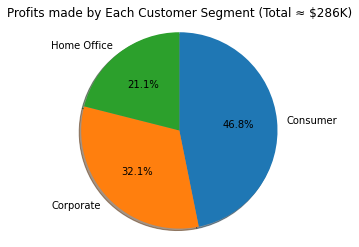

In [28]:
data = sample1[['Segment', 'Profit']].groupby(['Segment']).sum()

# Plot the pie chart
plt.pie(data['Profit'], labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Profits made by Each Customer Segment (Total ≈ $286K)')
plt.show()


Observations from the plot above-
>(1) Around 50% of the total sales were made in the consumer segment which comprises of the individual buyers.

>(2) The Corporate sector and Home Office segments have around 31% and 19% sales respectively.

>(a) While the Consumer segment had more than 50% in sales, its total contribution in the profits made by the company is only       around 46%. This shows that the company is bearing a higher loss in the Consumer segment.

>(b) The Corporate and the Home Office segments are returning more profits to the supermarket as compared to the sales made.         While their joint sales is around 50%, thier joint profits made for the supermarket is around 54%.

Here, the company can do two things in order to increase their profits. They can look into the reasons why they are bearing more losses in the consumer segment and try to reduce those losses, thus directly increasing the sales.

Other route the company can take is to providing more polished services to the Corporate and Home Office segments, thus driving them towards more profits.

In [29]:
sample1['price_per_product'] = sample1.Sales / sample1.Quantity
sample1['profit_per_product'] = sample1.Profit / sample1.Quantity 

data = sample1.groupby(['Category'])

for cat, sample1 in data:
    sizes = np.absolute(sample1.price_per_product)
    fig = px.scatter(sample1, x = 'price_per_product', title = cat.upper(), 
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        height = 500,
        xaxis = dict(title='Price Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()

Observation across each product category-

1) Furnitures-

>    (i) If we see the average price, we'll find that most of the tables and chairs are around the $200 mark, making them one of the most expensive furniture items.Some tables go as high as USD 550 while the most expensive chair costs USD 700.

>    (ii) The most expensive item in the furniture category is a bookcase costing $880.

2) Office Supplies-

>   (i) Most office supplies fall under the $100 mark.

>   (ii) Binders and supplies are the most expensive categories, going as high as $1890.

3) Technology-

>   (i) As per the plot, products in the machines and copiers sub categories are the most expensive technology items.

>   (ii)Most products fall under the $200 price tag.

In [30]:
for cat, df in data:
    sizes = np.absolute(df.profit_per_product)
    fig = px.scatter(df, x = 'profit_per_product', title = cat.upper(), 
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        autosize = True,
        height = 500,
        xaxis = dict(title='Profit/Loss Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()

Observation across each product category-

1) Furnitures-

>  (I) Upon observing the plot, it is evident that tables are one of the businesses where the supermarket is losing most of its       money.

>  (II) Book cases is another business where the supermarket is mostly just bearing losses.

>  (III) If we see the overall performance, chairs seem to be generating the highest profits for the supermarket.

2) Office Supplies-

>  (I) While binders generate most revenue for the company, it is also one of the highest-loss sub-categories in the office            supplies category.

3) Technology-

>   (I) The company's machine sales cause the highest loss, going as high as $1300 in loss.


While the above plots gives us a rough idea regarding how and in what sub category the supermarket is losing the money, it's still now clear how each sub category is performing considering the overall data. Let's have a look at the performance of each sub category.

In [31]:
for cat, df in data:
    subCat = df.groupby(['Sub-Category']).sum()
    fig = px.bar(subCat, y = 'Profit', title = cat.upper(), 
                    color = subCat.index)
    fig.update_layout(
        autosize = True,
        width = 600,
        yaxis = dict(title='Profit/Loss Per Product Sub-Category'),
        xaxis = dict(title=''),
    )
    fig.show()


From the above given plots, it is clear that-

> A) Tables and Bookcases are the businesses where the company is losing most of its money.

> B) While the technology business is making most of the profits for the company, the machines business makes the least profit.      The supermarket can improve in that sub-category.

> C) Considering the combined turnover from each category, the furniture business is where the company is barely making any          consideraable profit.Maybe the shipping modes and shipping costs for the furniture products, which are usually large, has      something to do with the low profits/high losses.

Now, let's have a look at which shipping method different consumer segments use the most for buying products in different product categories.

In [32]:
ship_segment = df.groupby(['Segment'])
segment_list = df.Segment.value_counts().index
cat_list = df.Category.value_counts().index

for segment in segment_list:
    seg_shipping = ship_segment.get_group(segment)
    standard, second, first, same = [], [], [], []
    for cat in cat_list:
        count = seg_shipping.groupby(['Category']).get_group(cat)['Ship Mode'].value_counts()
        standard.append(count[0]), second.append(count[1]), first.append(count[2]), same.append(count[3])
        
        fig = go.Figure()
    fig.add_trace(go.Bar(x = cat_list,y = standard,name='Standard Class',marker_color='rgb(137,51,51)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = second,name='Second Class',marker_color='rgb(234,84,84)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = first,name='First Class',marker_color='rgb(250,127,78)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = same,name='Same Day',marker_color='lightsalmon'
                        ))

    fig.update_layout(
        barmode ='group',
        width = 600,
        title = segment.upper(),
        yaxis = dict(title = 'Number of Deliveries'))
    fig.show()

Observations from the above given plot-

>  a) Standard class shipping is the most used shipping method across all consumer segments and product categories.

>  b) Across all three consumer segments, office supplies are the most bought products, and the technology items are the least        bought products.

**Now, let's consider how much loss each shipping category bears.**

In [33]:
df['loss'] = df.Profit.apply(lambda x: x if (x < 0) else 0)

fig = px.bar( df,x = 'Ship Mode', y = 'loss', title = 'Losses in Each Shipping Category'.upper(), 
                    color = 'Ship Mode', hover_data=['loss', 'Sub-Category'])
fig.update_layout(
        autosize = True,
        width = 800,
        yaxis = dict(title='Total Loss'),
        xaxis = dict(title='Shipping Class'),
    )
fig.show()

Observations from the plot above-

>(i) The highest loss beared by the company was while delivering products via the standard class shipping. This is of no             surprise, since most products were delivered using standard shipping. However, one important thing to be noted is that some     of the biggest losses beared by the superstore also fall under the standard shipping category, one going as high as $6,600     in a single sale.

>(ii) First and second class shipping have almost equal losses. This is also no surprise since the number of sales shipped under      each shipping category were also almost equal.


Apart from this information, it doesn't seem that shipping has a major effect on profits or losses as such.

Now, for the last part of EDA section, we will see how discounts affect the sale of products and the revenue generated by it.

In [34]:
df['whether_discount'] = df.Discount.apply(lambda x: 'No Discount' if (x == 0) else 'Discount')

discount_data = df.groupby(['whether_discount']).mean()

def discount_plotter(data_type = 'total'):
    """Plots discount data related plots.
    Args:
        data_type- 'total' or 'average', depending on you want the average statistics or total stats.
    """
    color = ['rgb(81,81,246)', 'rgb(209,70,70)']
    if data_type == 'average':
        discount_data = df.groupby(['whether_discount']).mean()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('AVERAGE SALE', 'AVERAGE PROFIT/LOSS', 'AVERAGE PRICE PER PRODUCT'))
    else:
        discount_data = df.groupby(['whether_discount']).sum()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('TOTAL SALE', 'TOTAL PROFIT/LOSS', 'TOTAL PRICE PER PRODUCT'))
    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Sales, marker_color = color),
            row=1, col=1
    )
    
    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Profit, marker_color = color),
            row=1, col=2
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.price_per_product, marker_color = color),
            row=1, col=3
    )
    fig.update_layout(showlegend=False)
    fig.show()
    
discount_plotter('average')
discount_plotter()

Observations from the above given plots-

> A) Considering both average and total sales, it seems that people tend to buy more things when it is selling at a discounted      price. An average sale at discounted price is of around USD 232 as compared to USD 226 on undiscounted price.

> B) On an average, a discounted sale results in a loss of around USD 6 as compared to around USD 66 in profit on a non-            discounted sale. Also, the company made a total profit of around USD 320K on non-discount sales, as compared to a loss of      around USD 34K on discounted sales.

> C) The average price of a discounted product is around USD 62, while the same is around USD 58 for a non-discounted item.

One thing to be noted is that while the superstore is incurring losses due to giving discounts on its products, they can't stop giving discounts of their products. Most of the heavy discounts are during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock. Also, by incurring small losses, the company gains in the future by attracting more long term customers. Therefore, the small losses from discounts are an essential part of company's business.

# Using Cluster Analysis(K-Mean Clustering)

In [52]:
x = sample.iloc[:, [9, 10, 11, 12]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

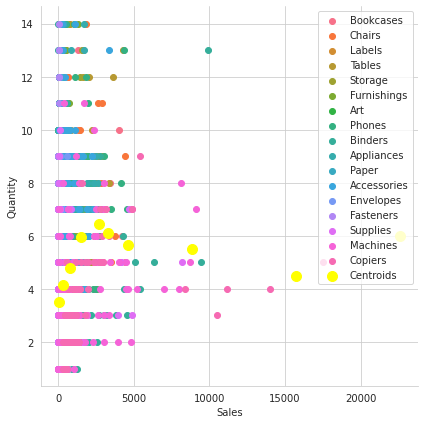

In [53]:
sns.set_style("whitegrid") 
sns.FacetGrid(sample, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

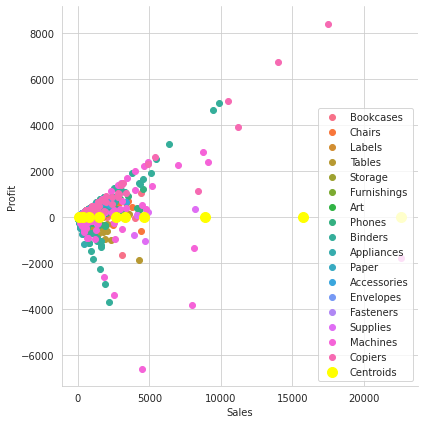

In [54]:
sns.set_style("whitegrid") 
sns.FacetGrid(sample, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Profit')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

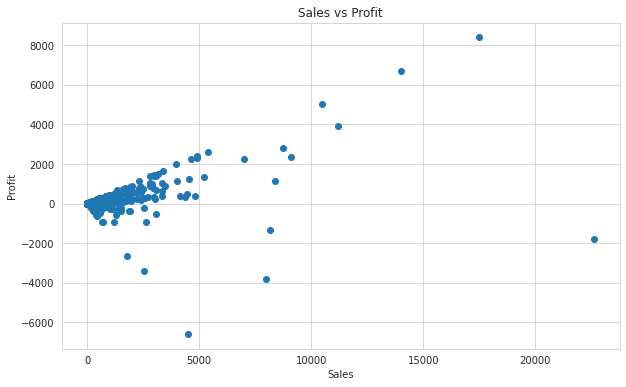

In [55]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(sample1["Sales"] , sample1["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_title('Sales vs Profit')
plt.show()

From the Above data Visualization and Clustering we can see that in Which states and in which Category Sales and profits are High or less,We can improve in that States By Providing Discounts in prefered Range so that Company and cosumer both will be in profit.So For Deciding that Range we have to do some Technical Analysis.One can Do it through Factor Analysis.


One thing to be noted is that while the superstore is incurring losses due to giving discounts on its products, they can't stop giving discounts of their products. Most of the heavy discounts are during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock. Also, by incurring small losses, the company gains in the future by attracting more long term customers. Therefore, the small losses from discounts are an essential part of company's business

**Factor Analysis**

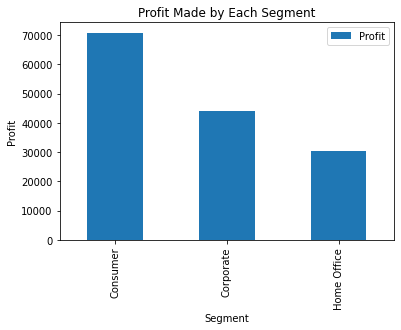

In [40]:
from sklearn.decomposition import PCA
# Group the data by Segment and sum the profits
grouped_data = sample1.groupby(['Segment'])['Profit'].sum().reset_index()

# Select the numerical columns
numerical_data = grouped_data[['Profit']]

# Initialize the PCA model
pca = PCA(n_components=1)

# Fit the PCA model to the data
pca.fit(numerical_data)

# Transform the data into the first two principal components
transformed_data = pca.transform(numerical_data)

# Plot the transformed data
grouped_data.plot(x='Segment', y='Profit', kind='bar')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Profit Made by Each Segment')
plt.show()



By exploring the data and performing factor analysis, you can find the following business problems:

There might be some regions that are not performing well compared to other regions. You can focus on these regions to improve the sales.

There might be some categories that are not performing well compared to other categories. You can focus on these categories to improve the sales.

There might be some outliers in the sales data, which might be affecting the average sales. You can investigate these out